3532

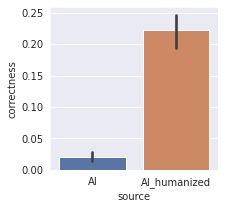

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import language_tool_python as ltp
import numpy as np

sns.set({'figure.figsize':(3, 3)})

fname = './H+GPT3/dv2_all_final_disguise_mistakes_correct.csv'
df = pd.read_csv(fname)

df = df[df.source=='AI']
df['len'] = df['lena1']
df['correctness'] = df['corra1']
df2 = df.copy()
df2['a1'] = df2['a2']
df2['len'] = df2['lena2']
df2['correctness'] = df2['corra2']
df2['source'] = 'AI_humanized'
df = pd.concat([df, df2])


# all of the above in one line:
# sns.barplot(x='source', y='len', data=df)
sns.barplot(x='source', y='correctness', data=df.groupby(['sub_id', 'source'], as_index=False).mean())

df = df.drop(columns=['a2', 'lena2', 'lena1', 'corra2', 'corra1', 'q2', 'len', 'correctness'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.to_csv('dv2_full_ai_2.csv')
df.shape[0]
# plt.show()
# sns.barplot(x='source', y='len', data=df)
